# Fourier Transform

### $\hat{f}(\omega) = \int_{-\infty}^{\infty}f(x)e^{-i\omega x}dx$

### $f(x) = \frac{1}{2\pi} \int_{-\infty}^{\infty}\hat{f}(\omega)e^{i\omega x}d\omega$

# Discrete Fourier Transform
### $\hat{f}_k = \sum_{j=0}^{n-1}f_{j}e^{-i 2\pi jk / n}$ (the kth fourier coefficient)

### $f_k = \frac{1}{n} \sum_{j=0}^{n-1}\hat{f_{j}}e^{i 2\pi jk / n}$ (the kth signal value)


In [1]:
import numpy as np
import pandas as pd
import scipy.fft as fft
import matplotlib.pyplot as plt
from typing import List
%matplotlib inline

#### Util functions

In [5]:
def generate_sine_wave(freq, sample_rate:int, duration:int):
    
    # Generates samples from 0 to duration (time units) with sample_rate samples
    # per time unit (ex Hz)
    x = np.linspace(0, duration, sample_rate * duration, endpoint=False)
    frequencies = x * freq
    
    # 2pi because np.sin takes radians
    y = np.sin((2 * np.pi) * frequencies)
    
    return x, y

def generate_signal(frequencies:List[str], sample_rate:int, duration:int, stdev:float=None):
    
    # Generate array of 0's of size sample_rate*duration
    y = np.zeros(sample_rate*duration)
    
    for freq in frequencies:
        
        t, y_tmp = generate_sine_wave(freq, sample_rate, duration)
        y += y_tmp
    
    # Add noise to the signal
    if stdev:
        
        y += np.random.normal(loc=0, scale=stdev, size=len(y))
        
    return t, y
    

#### Generate fake signal

In [13]:
SAMPLE_RATE = 440
DURATION = 2

frequencies = [3, 5, 10]
stdev = 1

t, y = generate_signal(frequencies, SAMPLE_RATE, DURATION, stdev)

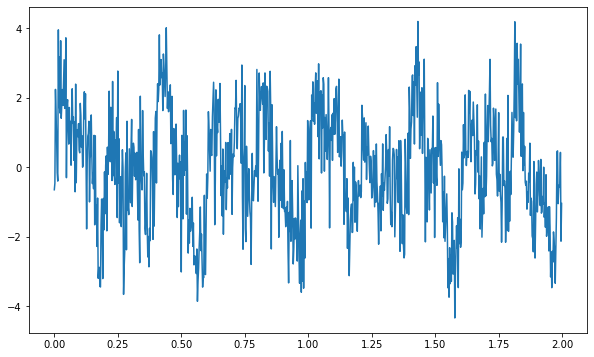

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(t, y)

#### Apply fourier transform and analyze

In [21]:
yf = fft.rfft(y)
xf = fft.rfftfreq(len(y), 1 / SAMPLE_RATE)

fourier_df = pd.DataFrame({'frequency':xf, 'magnitude':np.abs(yf)}).sort_values('magnitude', ascending=False)
print(fourier_df.shape)
fourier_df.head(10)

(441, 2)


,frequency,magnitude
10,5.0,466.207074
6,3.0,440.675230
20,10.0,432.406247
383,191.5,73.442976
201,100.5,70.367103
387,193.5,68.934266
25,12.5,67.098559
124,62.0,66.554344
367,183.5,64.533450
101,50.5,61.943438


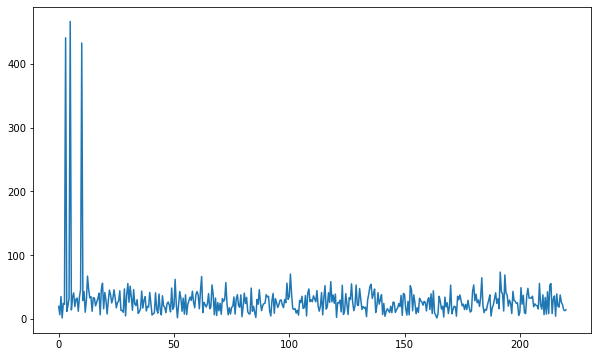

In [24]:
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(xf, np.abs(yf))

In [35]:
# Filter out non-dominate frequencies
yf_filtered = np.where(np.abs(yf) < 400, 0, yf)
yf_filtered

array([ 0.          +0.j        ,  0.          +0.j        ,
        0.          +0.j        ,  0.          +0.j        ,
        0.          +0.j        ,  0.          +0.j        ,
       -8.75373075-440.58827791j,  0.          +0.j        ,
        0.          +0.j        ,  0.          +0.j        ,
        0.76189969-466.20645107j,  0.          +0.j        ,
        0.          +0.j        ,  0.          +0.j        ,
        0.          +0.j        ,  0.          +0.j        ,
        0.          +0.j        ,  0.          +0.j        ,
        0.          +0.j        ,  0.          +0.j        ,
       20.30268206-431.92934992j,  0.          +0.j        ,
        0.          +0.j        ,  0.          +0.j        ,
        0.          +0.j        ,  0.          +0.j        ,
        0.          +0.j        ,  0.          +0.j        ,
        0.          +0.j        ,  0.          +0.j        ,
        0.          +0.j        ,  0.          +0.j        ,
        0.          +0.j

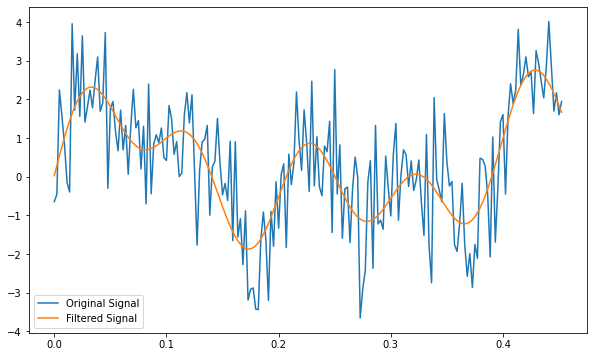

In [40]:
fig, ax = plt.subplots(figsize=(10, 6))
y_new = fft.irfft(yf_filtered)
plt.plot(t[0:200], y[0:200], label='Original Signal')
plt.plot(t[0:200], y_new[0:200], label='Filtered Signal')
ax.legend()